In [3]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn import linear_model
import sys
from collections import Counter

In [7]:
datafile1 = open('results-20181005-221531.csv', 'r') 
f= pd.read_csv(datafile1)

f.head()
#f['more_than_one_encounter'] = f['more_than_one_encounter'].astype(object)

print(f.shape)
print(len(f['unique_patient_id'].unique()))

(1510, 10)
1265


In [3]:
def brief(f):
    
    file1 = open("file.txt","w")
    
    file1.write("\n-----------------------------------")
    file1.write("\nThis dataset has"+" "+str(f.shape[0])+" "+"Rows"+" "+str(f.shape[1])+" "+"Atributes")
    file1.write("\n\nreal value attributes")
    file1.write("\n-----------------------------------")
    
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    
    a=f.describe(include=numerics).round(2)
    d=f.describe(include='all').T.reset_index().rename(columns={"index": "Attribute_Name"}).round(2)
    
    b= a.T.reset_index().rename(columns={"index": "Attribute_Name"})
    
    tr = pd.DataFrame({'Attribute_ID': [i for i in range(1,d.shape[0]+1)]})
    tr=tr.join(d.Attribute_Name)
    
    i=np.array(d['Attribute_Name'].reset_index(drop = True))
    ii=np.array(b['Attribute_Name'].reset_index(drop = True))
    fin= np.isin(i, ii)
    
    final= np.where(fin)

    sublist=[list(i) for i in final]
    flat_list0 = list(np.concatenate(final))
    flat_list= [x+1 for x in flat_list0]  #for numeric
    
    x = {v:k for v,k in enumerate(fin) if k == False}
    d=[]

    for name, age in x.items(): 
        d.append(name)
    
    flat0= [x for x in d] #for object
    flat= [x+1 for x in d] #for object

    df_drop = f.drop(f.columns[flat0], axis=1)  #for numeric
    df_dropo = f.drop(f.columns[flat_list0], axis=1)  #for object
    
    #b.index=b.index + 1
    b= b.rename(columns={"50%":"Median","mean":"Mean","std":"Sdev","min":"Min","max":"Max"})
    
    df = pd.DataFrame({'Attribute_ID': flat_list})
    
    
    df=df.join(b.Attribute_Name)
    df=df.join(pd.DataFrame({'Missing': df_drop.isnull().sum(axis=0).tolist()}))
    df=df.join(b['Mean'])
    df=df.join(b['Median'])
    df=df.join(b['Sdev'])
    df=df.join(b['Min'])
    df=df.join(b['Max'])
    df.index += 1 
    
    file1.write("\n"+str(df.to_string()))
    file1.write("\n\nsymbolic attributes")
    file1.write("\n-----------------------------------")           
    
    a=f.describe(include=object).T.reset_index().rename(columns={"index": "Attribute_Name","unique":"arity"})
    
    af = pd.DataFrame({'Attribute_ID': flat})
    af=af.join(a['Attribute_Name'])   
    af=af.join(pd.DataFrame({'Missing': df_dropo.isnull().sum(axis=0).tolist()}))
    af=af.join(a['arity']) 
    df_dropo.dropna(inplace=True)
    m,n= df_dropo.shape
    df_dropo = df_dropo.astype(str)
    
    
    f = pd.DataFrame(columns=['MCVs_counts'])
    for i in range(n):
        uni,counts= np.unique(df_dropo[df_dropo.columns[i]],return_counts=True)
        c = sorted(counts,reverse=True)
        count_sort_ind = np.argsort(-counts)
        unique_des= uni[count_sort_ind]
        uni=unique_des.tolist()
        co=count_sort_ind.tolist()
        if (len(unique_des))==1:
            f= f.append({'MCVs_counts':str(unique_des[0])+'('+ str(c[0])+')'},ignore_index=True)
        elif (len(unique_des))==2:
            f= f.append({'MCVs_counts':str(unique_des[0])+'('+ str(c[0])+')'+" "+str(unique_des[1])+'('+ str(c[1])+')'},ignore_index=True)
        else:
            f= f.append({'MCVs_counts':str(unique_des[0])+'('+ str(c[0])+')'+" "+str(unique_des[1])+'('+ str(c[1])+')'+str(unique_des[2])+'('+ str(c[2])+')'},ignore_index=True)
    
    #af=af.concat(f['MCVs_counts'])    
    f['MCVs_counts'] = f['MCVs_counts'].astype(str)
    #aff=pd.concat([af, f],axis=0)
    af=af.join(f) 
    af.index += 1 
    
    file1.write("\n"+str(af.to_string()))
        
    file1.close()
    return 

brief(f)

In [4]:
datafile1 = open('results-20181005-221531.csv', 'r') 
f= pd.read_csv(datafile1)

f.head()
f['more_than_one_encounter'] = f['more_than_one_encounter'].astype(object)

f.head()

,visit_number,unique_patient_id,discharge_date,Time,Day,age,zip_code,race,sex,more_than_one_encounter
0,328302775314,840049133,10/23/2017,8:05:00,PM,21,15147,Black,Female,False
1,254421805169,981115173,6/2/2017,10:56:00,AM,21,15206,Black,Female,False
2,254421995290,981115172,9/30/2017,2:44:00,AM,21,15206,Black,Female,False
3,880369055290,785542959,9/29/2017,7:47:00,PM,50,15206,Black,Female,False
4,406633045281,980953611,9/20/2017,11:06:00,PM,25,15212,Black,Female,False


Text(0,0.5,'Count')

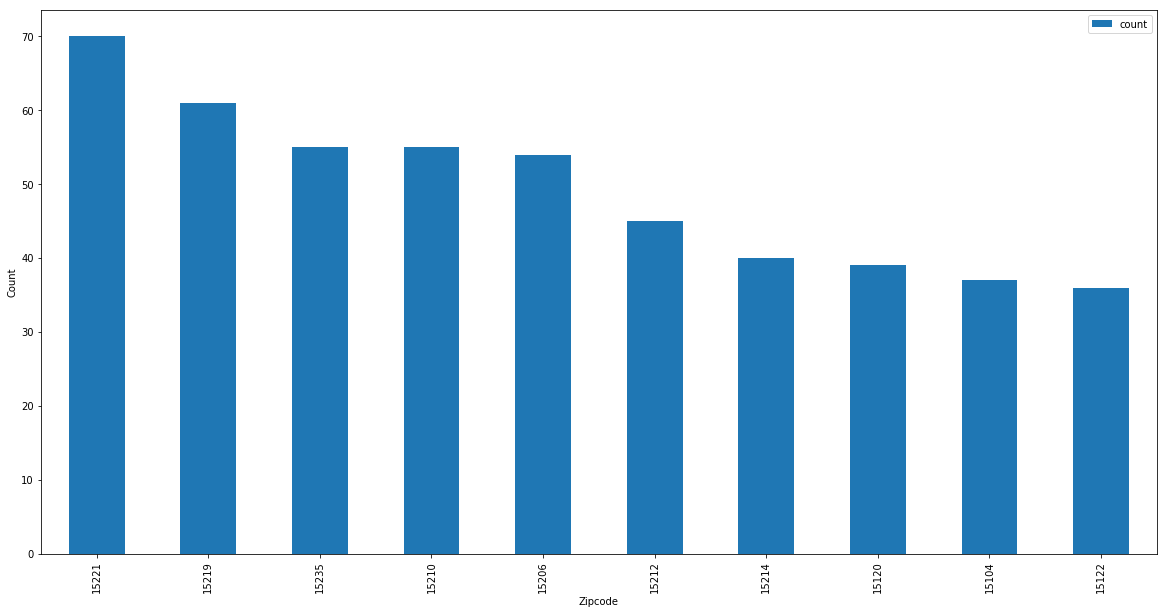

In [5]:
#Top 10 Zipcode

uni_zipcode= f['zip_code'].unique()
number_uni_zipcode= Counter(f['zip_code'])
dff = pd.DataFrame.from_dict(number_uni_zipcode,orient='index')
dff = dff.rename(columns={'index':'Frequency at zipcode', 0:'count'})

a= dff.sort_values(by='count', ascending=False)

a.head(10).plot.bar(figsize=(20,10))
plt.xlabel('Zipcode')
plt.ylabel('Count')

Text(0,0.5,'Count')

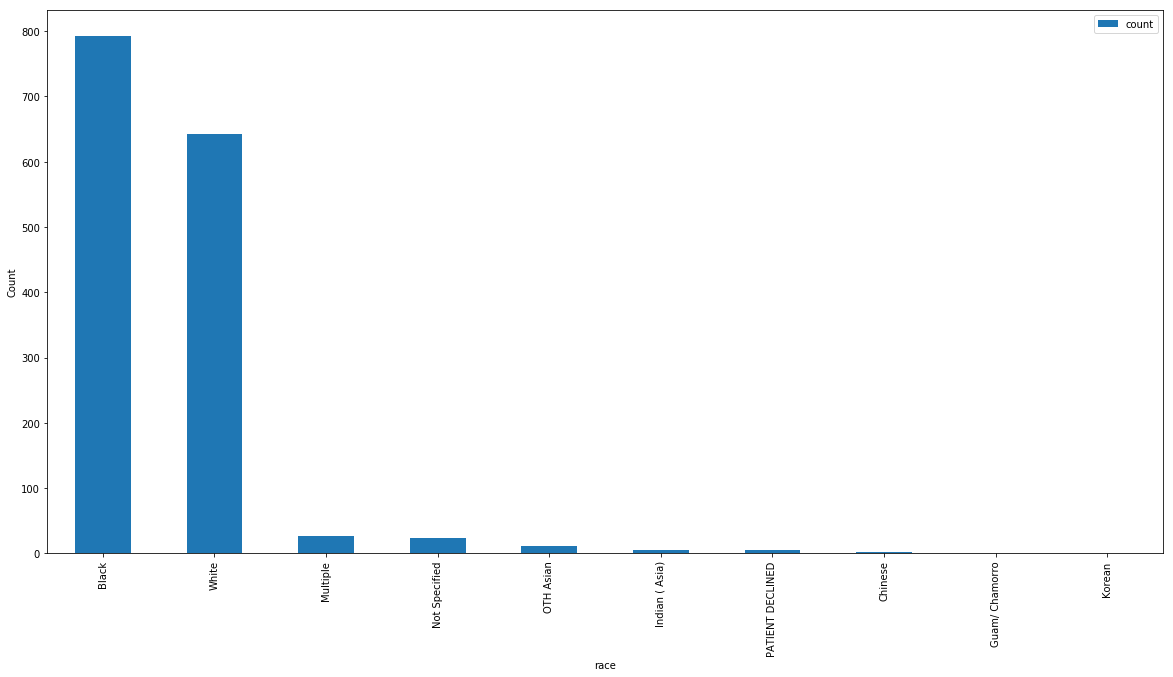

In [6]:
#Top 10 Races

uni_zipcode= f['race'].unique()
number_uni_zipcode= Counter(f['race'])
dff = pd.DataFrame.from_dict(number_uni_zipcode,orient='index')
dff = dff.rename(columns={'index':'Frequency at zipcode', 0:'count'})

a= dff.sort_values(by='count', ascending=False)

a.head(10).plot.bar(figsize=(20,10))
plt.xlabel('race')
plt.ylabel('Count')

Text(0,0.5,'Count')

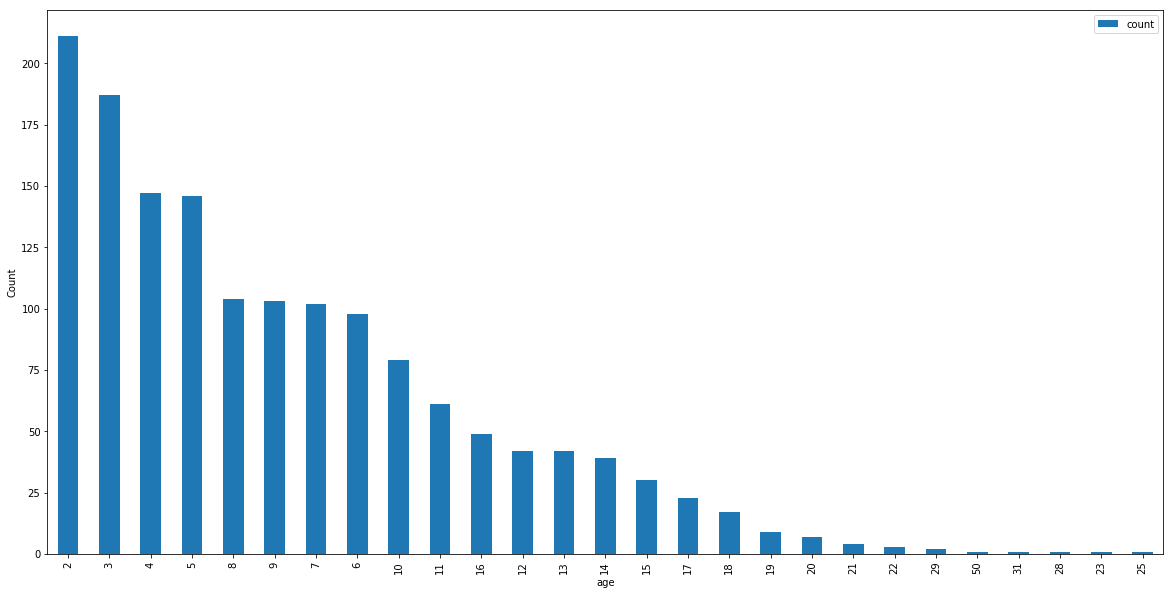

In [7]:
#Count for age

uni_age= f['age'].unique()
number_age= Counter(f['age'])
dff = pd.DataFrame.from_dict(number_age,orient='index')
dff = dff.rename(columns={'index':'Frequency at age', 0:'count'})

a= dff.sort_values(by='count', ascending=False)

a.plot.bar(figsize=(20,10))
plt.xlabel('age')
plt.ylabel('Count')


Text(0,0.5,'Count')

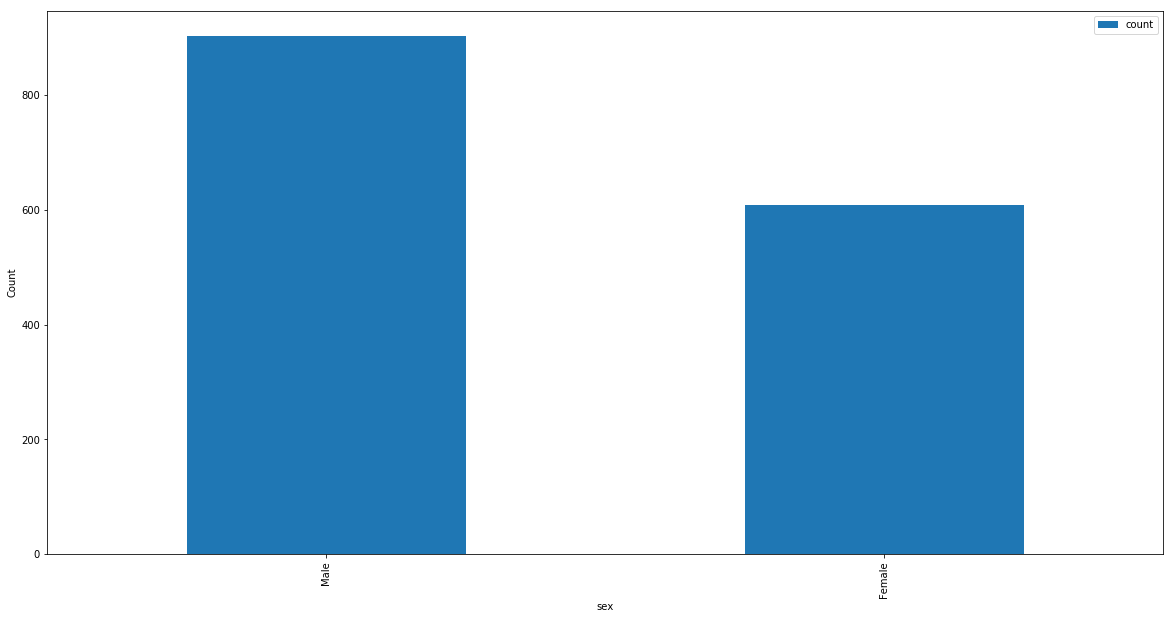

In [8]:
#Count for females

uni_age= f['sex'].unique()
number_age= Counter(f['sex'])
dff = pd.DataFrame.from_dict(number_age,orient='index')
dff = dff.rename(columns={'index':'Frequency at sex', 0:'count'})

a= dff.sort_values(by='count', ascending=False)

a.plot.bar(figsize=(20,10))
plt.xlabel('sex')
plt.ylabel('Count')

In [9]:
#Year of frequent illness

f['discharge_date'] = pd.to_datetime(f['discharge_date'])
f['year'], f['month'] = f['discharge_date'].dt.year, f['discharge_date'].dt.month

uni_year= f['year'].unique()
number_year= Counter(f['year'])
dff = pd.DataFrame.from_dict(number_year,orient='index')
dff = dff.rename(columns={'index':'Frequency at year', 0:'count'})

a= dff.sort_values(by='count', ascending=False)
#b= f.sort_values(by='month', ascending=False).head(1)

month = f['month'].loc[f['year'] == 2018]  #in year 2018

print(a)

      count
2017   1509
2018      1


Text(0,0.5,'Count')

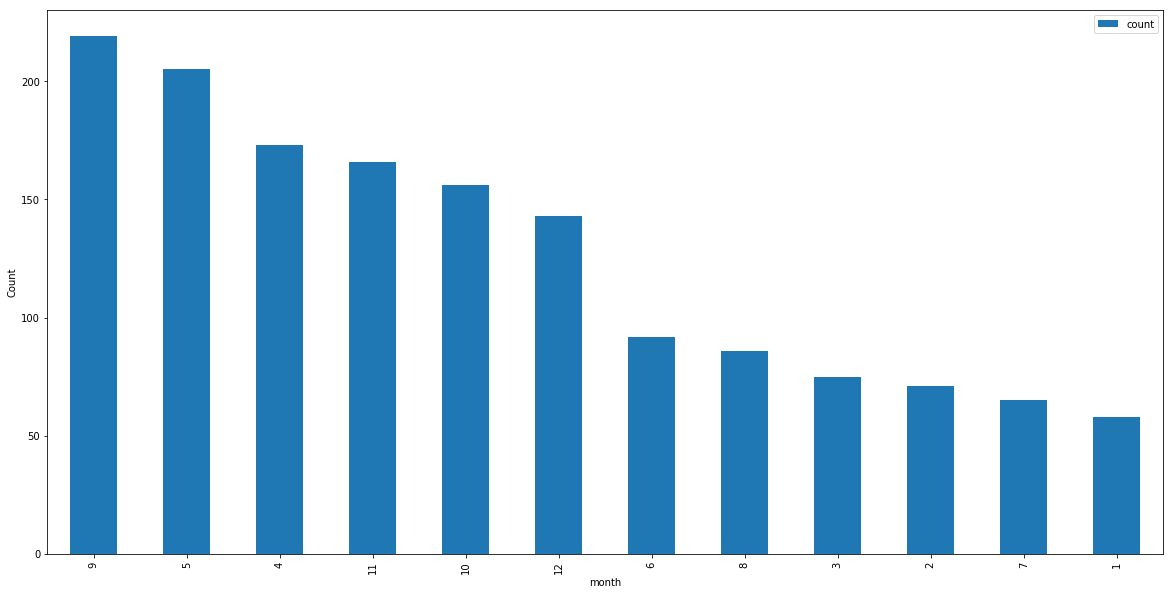

In [10]:
#Seasonal Changes 

month = pd.DataFrame({'month': f['month'].loc[f['year'] == 2017]})
number_age= Counter(month['month'])
dff = pd.DataFrame.from_dict(number_age,orient='index')
dff = dff.rename(columns={'index':'Frequency at sex', 0:'count'})

a= dff.sort_values(by='count', ascending=False)

a.plot.bar(figsize=(20,10))
plt.xlabel('month')
plt.ylabel('Count')

Text(0,0.5,'Count')

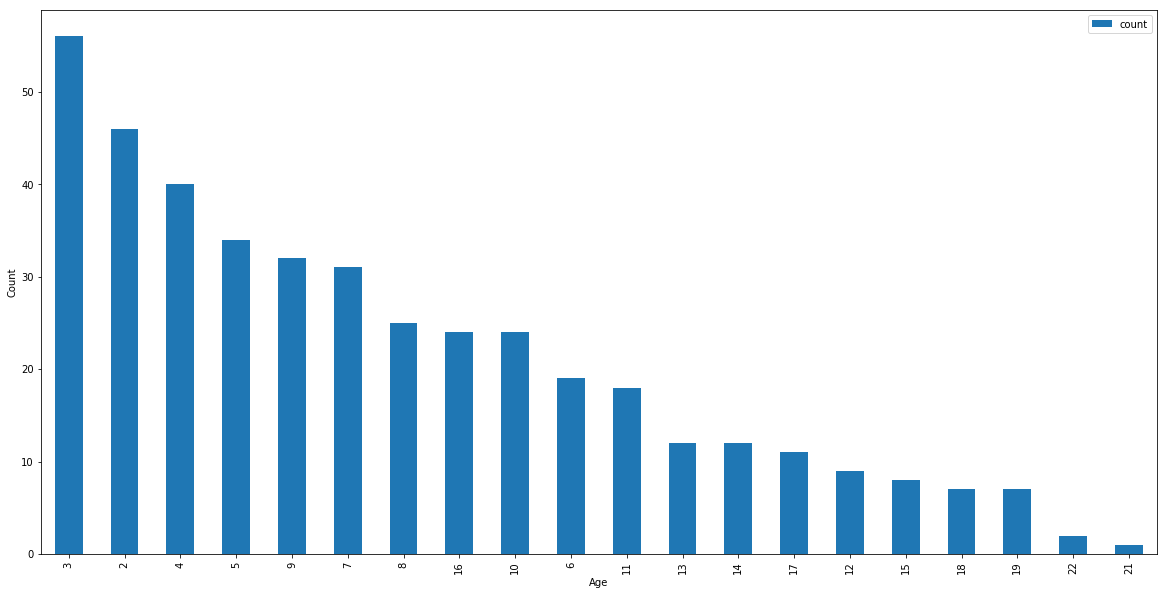

In [11]:
#Revisiting doctor based on age
#Child immune system is weak, so they are vulnerable to asthma

Truest= f.loc[f['more_than_one_encounter'] == True]

group= Truest.groupby('age')['more_than_one_encounter'].count()

group= pd.DataFrame({'count': group})
a= group.sort_values(by='count', ascending=False)

a.plot.bar(figsize=(20,10))
plt.xlabel('Age')
plt.ylabel('Count')

In [12]:
#Creating file using location for each zipcode

import uszipcode
searchEngine = uszipcode.SearchEngine()

latt=[]
lngg=[]

for i in range(len(f['zip_code'])):
    myZip = searchEngine.by_zipcode(f['zip_code'][i])
    lat,lng = [myZip.lat,myZip.lng] ##population info may need further updated later
    latt.append(lat)
    lngg.append(lng)
    

pdd= pd.DataFrame({'zip': f['zip_code']})
pd1= pd.DataFrame({'latitude': latt})
pd2= pd.DataFrame({'longitude': lngg})

pdd= pdd.join(pd1)
pdd= pdd.join(pd2)

pdd= pdd.dropna()

pdd.to_csv('location.csv',index=False)

In [4]:
import gdal

ModuleNotFoundError: No module named 'gdal'